In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
%store -r c2x
df = c2x
df

,Row Labels,Daily Flows,Cash Balance
0,2019-06-25,125786.36,125786.36
1,2019-06-27,-80519.58,45266.78
2,2019-06-30,402373.82,447640.60
3,2019-07-01,68733.61,516374.21
4,2019-07-03,-16095.22,500278.99
...,...,...,...
117,2020-06-15,-19845.86,2869469.43
118,2020-06-19,-3008.85,2866460.58
119,2020-06-20,-1503.80,2864956.78
120,2020-06-25,-158314.12,2706642.66


In [3]:
df['Row Labels'].dtype

dtype('<M8[ns]')

In [4]:
df['Row Labels'] = df['Row Labels'].apply(pd.to_datetime)
df['Row Labels'].dtype

dtype('<M8[ns]')

In [5]:
df.index = df.pop('Row Labels')
df.head()

,Daily Flows,Cash Balance
Row Labels,,
2019-06-25,125786.36,125786.36
2019-06-27,-80519.58,45266.78
2019-06-30,402373.82,447640.60
2019-07-01,68733.61,516374.21
2019-07-03,-16095.22,500278.99


In [6]:
df = df.sort_values('Row Labels')
df.head()

,Daily Flows,Cash Balance
Row Labels,,
2019-06-25,125786.36,125786.36
2019-06-27,-80519.58,45266.78
2019-06-30,402373.82,447640.60
2019-07-01,68733.61,516374.21
2019-07-03,-16095.22,500278.99


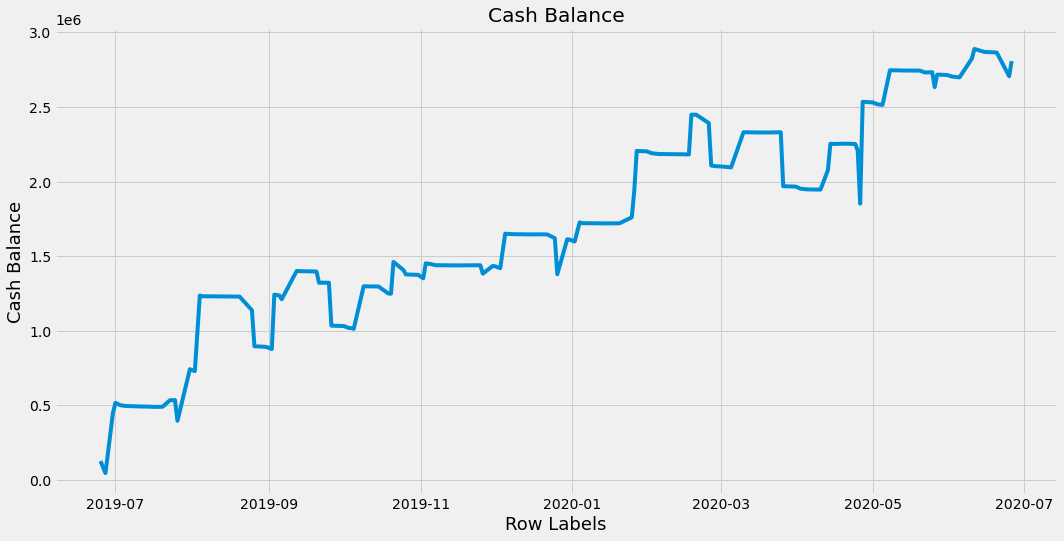

In [7]:
#Visualize the data
plt.figure(figsize = (16,8))
plt.title('Cash Balance')
plt.plot(df['Cash Balance'])
plt.xlabel('Row Labels', fontsize = 18)
plt.ylabel('Cash Balance', fontsize = 18)
plt.show()

In [8]:
#Create a new dataframe
data = df.filter(['Cash Balance'])
#Convert to np.array
dataset = data.values
#Get the number of rows to train the model
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

98

In [9]:
#Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [10]:
#Make training datasets
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([-2.18655368, -2.29950949, -1.73504478, -1.63862275, -1.66120172,
       -1.66826773, -1.67269834, -1.67481915, -1.6769804 , -1.67553603,
       -1.61376025, -1.61296911, -1.80751266, -1.32260877, -1.34041058,
       -0.62905786, -0.63613071, -0.63825058, -0.63933189, -0.76724535,
       -1.10692706, -1.11084788, -1.11480661, -1.13254906, -0.62116629,
       -0.62825345, -0.66369971, -0.39868094, -0.40078803, -0.40326308,
       -0.50840413, -0.50874799, -0.91257919, -0.9165596 , -0.93426204,
       -0.93540518, -0.94248559, -0.54227281, -0.54438203, -0.61113671,
       -0.61143588, -0.31309124, -0.388797  , -0.43080012, -0.4347842 ,
       -0.46754324, -0.32659096, -0.33368786, -0.34377267, -0.34587712,
       -0.34493267, -0.34439323, -0.42375005, -0.35096069, -0.35494894,
       -0.37265744, -0.0476468 , -0.05207562, -0.05418267, -0.05378459])]
[-0.05492892245675121]

[array([-2.18655368, -2.29950949, -1.73504478, -1.63862275, -1.66120172,
       -1.66826773, -1.67269834, -1.

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((38, 60), (38,))

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(38, 60, 1)

In [13]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25, activation='swish'))
model.add(Dense(1))

In [14]:
model.compile(optimizer='adam', loss = 'mse', metrics = [RootMeanSquaredError()])

In [15]:
#Train the model with validation split for validation data
history = model.fit(x_train, y_train, batch_size = 75, epochs = 5, validation_split=0.2, shuffle = True)

Epoch 1/5
1/1 [==============================] - 8s 8s/step - loss: 0.3862 - root_mean_squared_error: 0.6215 - val_loss: 0.2996 - val_root_mean_squared_error: 0.5473
Epoch 2/5
1/1 [==============================] - 0s 106ms/step - loss: 0.3513 - root_mean_squared_error: 0.5927 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996
Epoch 3/5
1/1 [==============================] - 0s 134ms/step - loss: 0.3180 - root_mean_squared_error: 0.5639 - val_loss: 0.2032 - val_root_mean_squared_error: 0.4508
Epoch 4/5
1/1 [==============================] - 0s 107ms/step - loss: 0.2858 - root_mean_squared_error: 0.5346 - val_loss: 0.1597 - val_root_mean_squared_error: 0.3997
Epoch 5/5
1/1 [==============================] - 0s 140ms/step - loss: 0.2543 - root_mean_squared_error: 0.5043 - val_loss: 0.1195 - val_root_mean_squared_error: 0.3458


In [16]:
#Create testing dataset
#Create a new array
test_data = scaled_data[training_data_len - 60: , :]
#Create datasets x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [17]:
x_test = np.array(x_test)

In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(x_test)

1/1 [==============================] - 2s 2s/step


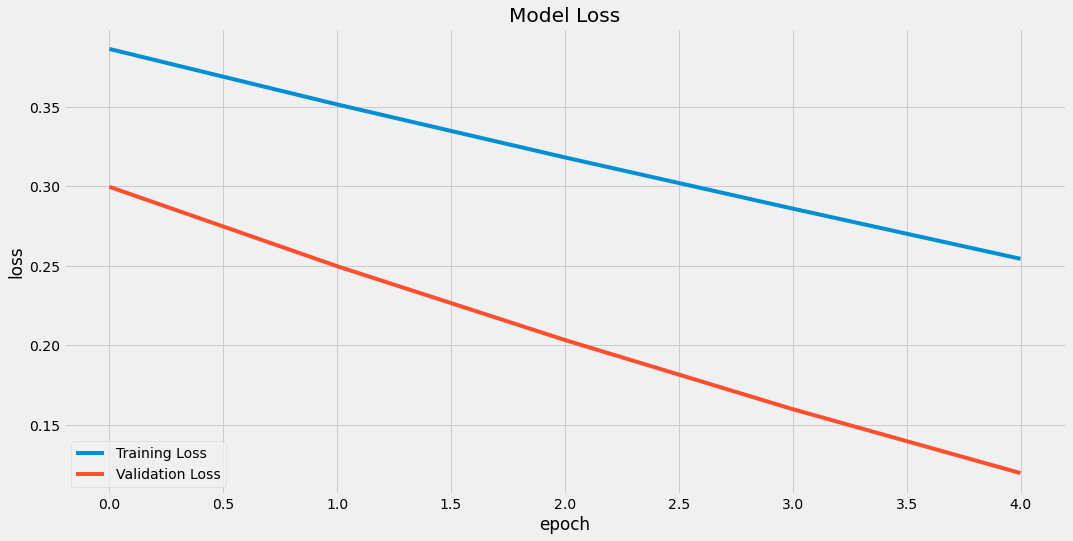

In [20]:
#Visualise loss
#Visualizing loss
plt.figure(figsize = (16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower left')
plt.show()

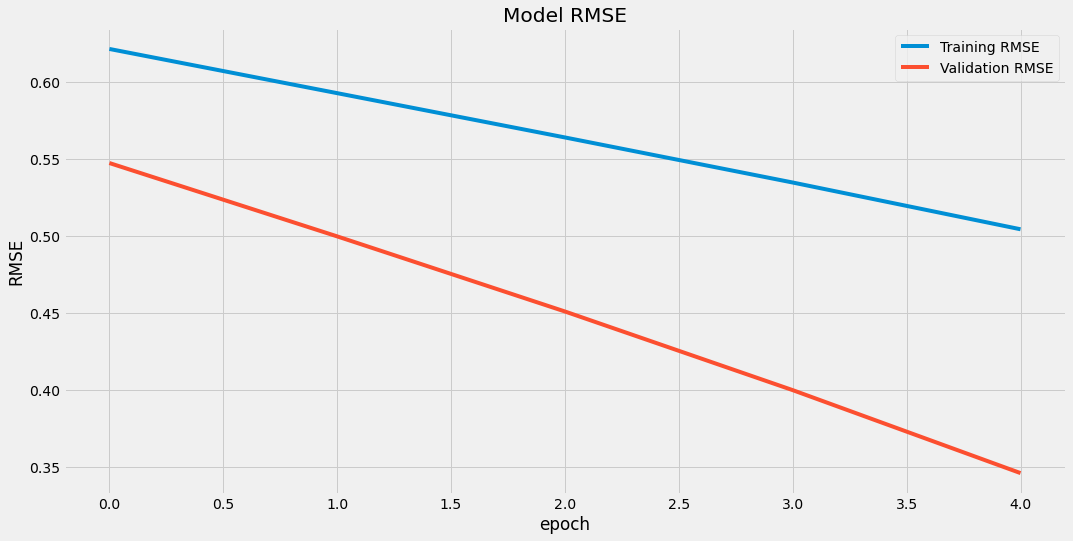

In [21]:
plt.figure(figsize = (16,8))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend(['Training RMSE', 'Validation RMSE'], loc = 'upper right')
plt.show()